In [28]:
import pandas as pd
import numpy as np

# Download data

In [29]:
data_path = "https://raw.githubusercontent.com/Agnes4Him/project-datasets/refs/heads/main/teen_phone_addiction_dataset2.csv"
df = pd.read_csv(data_path)
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Male,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Female,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


# Data Exploration

In [30]:
df.shape

(3000, 25)

In [31]:
df.dtypes

ID                          int64
Name                       object
Age                         int64
Gender                     object
Location                   object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object

In [32]:
df.isnull().sum()

ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

In [33]:
df.Addiction_Level.describe()

count    3000.000000
mean        8.881900
std         1.609598
min         1.000000
25%         8.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: Addiction_Level, dtype: float64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='Addiction_Level', ylabel='Count'>

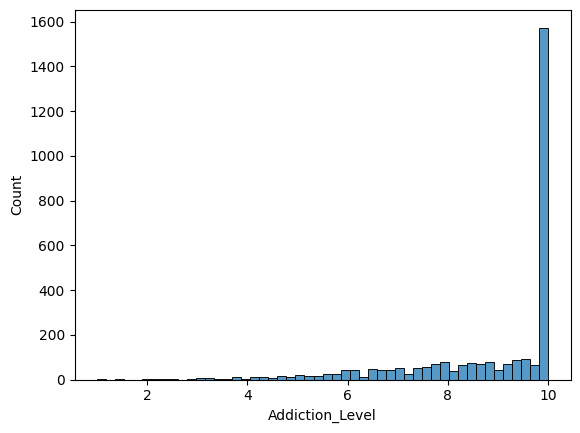

In [35]:
sns.histplot(df.Addiction_Level, bins=50)

# Feature Engineering

In [36]:
level_sqrt = np.sqrt(df["Addiction_Level"])

In [37]:
def categorize_level(x):
    if x < 4:
        return "Low"
    elif 4 < x < 7:
        return "Moderate"
    else:
        return "High"

df["Addiction_Category"] = df["Addiction_Level"].apply(categorize_level)

In [38]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Addiction_Category
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0,High
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0,High
2,3,Adrian Knox,13,Male,Lindseystad,11th,5.8,5.5,93,8,...,137,8,0.3,1.5,0.4,Education,6,5.7,9.2,High
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8,High
4,5,Steven Smith,14,Female,Port Lindsaystad,9th,2.5,6.7,56,4,...,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6,High


In [39]:
df_low = df[df["Addiction_Level"] < 4]
len(df_low)

41

In [40]:
df_medium = df[(df["Addiction_Level"] >= 4.0) & (df["Addiction_Level"] < 7.0)]
len(df_medium)

378

In [41]:
df_high = df[df["Addiction_Level"] >= 7]
len(df_high)

2581

In [42]:
len(df_low) + len(df_medium) + len(df_high)

3000

In [43]:
df[(df["Addiction_Level"] >= 4.0) & (df["Addiction_Level"] < 7.0)]

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Addiction_Category
20,21,Michael Williams,15,Female,Margaretmouth,12th,3.0,5.1,83,4,...,58,6,1.7,1.7,2.0,Social Media,8,6.7,6.2,Moderate
24,25,Mark Crawford,19,Male,Port Alan,12th,4.6,7.2,85,7,...,71,5,1.8,0.8,1.1,Social Media,8,6.2,6.0,Moderate
36,37,Laura Steele,13,Female,Burketown,8th,4.4,6.8,62,8,...,66,7,0.9,0.0,0.0,Browsing,1,6.9,4.6,Moderate
45,46,Brandi King,18,Female,Evanschester,8th,1.0,6.2,60,5,...,25,16,3.1,0.0,2.0,Gaming,4,5.8,4.7,Moderate
60,61,Derek York,19,Male,Shafferville,10th,3.7,7.9,89,9,...,92,7,0.9,2.1,0.9,Education,7,2.0,6.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2982,David White,19,Female,Andersonborough,8th,1.4,6.1,62,5,...,77,8,1.4,1.5,1.3,Browsing,2,3.0,4.4,Moderate
2985,2986,Karen Webb,18,Male,New David,10th,2.2,4.2,65,8,...,42,11,2.9,0.2,2.2,Browsing,1,8.6,6.2,Moderate
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5,Moderate
2997,2998,Norman Hughes,14,Female,Rebeccaton,7th,3.2,6.5,98,1,...,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2,Moderate


# Split Dataset

In [44]:
object_cols = df.select_dtypes(include='object').columns
non_object_cols = df.select_dtypes(exclude='object').columns

In [45]:
excluded_col = ["ID", "Name", "Addiction_Level", "Addiction_Category"]

categorical = [c for c in object_cols if c not in excluded_col]
numerical = [c for c in non_object_cols if c not in excluded_col]

categorical

['Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(1800, 600, 600)

In [48]:
df_train.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Addiction_Category
2239,2240,Ashley Adams,16,Male,South Timothyland,9th,4.0,9.0,92,0,...,97,16,1.1,2.2,0.7,Social Media,2,6.4,7.9,High
1376,1377,Raymond Flowers,17,Male,Lake Kristybury,11th,1.4,4.9,94,10,...,61,11,4.0,0.1,1.6,Social Media,5,3.2,6.5,Moderate
2857,2858,Zachary Herman,16,Male,Port Hollymouth,12th,4.7,8.3,54,5,...,71,14,2.5,2.3,1.9,Gaming,8,4.7,9.6,High
5,6,Mary Adams,13,Female,East Angelachester,10th,3.9,6.3,89,3,...,135,8,3.8,0.0,1.4,Social Media,7,6.0,8.8,High
842,843,John Fletcher,16,Female,Jimenezside,8th,5.6,6.9,96,8,...,87,17,3.7,0.3,0.8,Education,10,6.5,10.0,High


In [49]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Addiction_Category
0,2240,Ashley Adams,16,Male,South Timothyland,9th,4.0,9.0,92,0,...,97,16,1.1,2.2,0.7,Social Media,2,6.4,7.9,High
1,1377,Raymond Flowers,17,Male,Lake Kristybury,11th,1.4,4.9,94,10,...,61,11,4.0,0.1,1.6,Social Media,5,3.2,6.5,Moderate
2,2858,Zachary Herman,16,Male,Port Hollymouth,12th,4.7,8.3,54,5,...,71,14,2.5,2.3,1.9,Gaming,8,4.7,9.6,High
3,6,Mary Adams,13,Female,East Angelachester,10th,3.9,6.3,89,3,...,135,8,3.8,0.0,1.4,Social Media,7,6.0,8.8,High
4,843,John Fletcher,16,Female,Jimenezside,8th,5.6,6.9,96,8,...,87,17,3.7,0.3,0.8,Education,10,6.5,10.0,High


In [50]:
y_train = df_train["Addiction_Level"].values
y_val = df_val["Addiction_Level"].values
y_test = df_test["Addiction_Level"].values

del df_train["Addiction_Level"]
del df_val["Addiction_Level"]
del df_test["Addiction_Level"]

# One Hot Encoding

In [51]:
from sklearn.feature_extraction import DictVectorizer

In [52]:
dv = DictVectorizer(sparse=False)

In [53]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")
val_dict = df_val[categorical + numerical].to_dict(orient="records")
test_dict = df_test[categorical + numerical].to_dict(orient="records")

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

# Train a Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = lr.predict(X_val)

In [28]:
'''def root_mean_squared_error(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)'''

'def root_mean_squared_error(y, y_pred):\n    error = y_pred - y\n    mse = (error ** 2).mean()\n    return np.sqrt(mse)'

In [29]:
rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE for Linear Regression: {rmse}")

RMSE for Linear Regression: 1.0371233448100468


In [30]:
ridge = Ridge(alpha=1.0, random_state=42)
lasso = Lasso(alpha=1.0, random_state=42)

In [31]:
ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [32]:
y_pred = ridge.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE for Ridge: {rmse}")

RMSE for Ridge: 0.8271773208603872


# Retrain Ridge with full train dataset

In [33]:
full_train_dict = df_full_train[categorical + numerical].to_dict(orient="records")

X_full_train = dv.transform(full_train_dict)
y_full_train = df_full_train["Addiction_Level"].values

In [34]:
ridge.fit(X_full_train, y_full_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [35]:
y_pred = ridge.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE for Ridge with full train: {rmse}")

RMSE for Ridge with full train: 0.8416052514121879


In [36]:
lasso.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [37]:
y_pred = lasso.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE for Lasso: {rmse}")

RMSE for Lasso: 1.11126729363706


# Train a Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=50)

In [40]:
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [41]:
y_pred = dt.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE for DecisionTreeRegressor: {rmse}")

RMSE for DecisionTreeRegressor: 0.9917415679198789


# Train a Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf = RandomForestRegressor(
    n_estimators=5,
    #max_depth=3,
    min_samples_leaf=3,
    random_state=1, 
    n_jobs=-1)

In [44]:
rf.fit(X_train, y_train)

,n_estimators,5
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred = rf.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE for RandomForestRegressor: {rmse}")

RMSE for RandomForestRegressor: 0.6837206043029747


# Gradient boosting and XGBoost

In [46]:
import xgboost as xgb

In [47]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [48]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [49]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

In [50]:
y_pred = model.predict(dval)

rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE for XGBoost: {rmse}")

RMSE for XGBoost: 0.6031302956632177


# Retrain XGBoost Model with Full Train Dataset

In [51]:
full_train_dict = df_full_train[categorical + numerical].to_dict(orient="records")

X_full_train = dv.transform(full_train_dict)
y_full_train = df_full_train["Addiction_Level"].values

In [52]:
features = list(dv.get_feature_names_out())
dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [53]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, 
                  dfull_train, 
                  num_boost_round=10, 
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:1.27667	val-rmse:1.13037
[5]	train-rmse:0.48752	val-rmse:0.44267
[9]	train-rmse:0.30550	val-rmse:0.28204


In [54]:
y_pred = model.predict(dtest)

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE for XGBoost with full_train dataset: {rmse}")

RMSE for XGBoost with full_train dataset: 0.6593691999674732


# Save Model Locally

In [55]:
import pickle
#from sklearn.pipeline import make_pipeline

In [56]:
model_path = "model.bin"

with open(model_path, "wb") as f_out:
    pickle.dump((dv, model), f_out)

# Test Model

In [57]:
teen = df.iloc[10][categorical + numerical]
teen

Gender                         Female
Location                  Cherylburgh
School_Grade                     12th
Phone_Usage_Purpose             Other
Age                                18
Daily_Usage_Hours                 4.9
Sleep_Hours                       7.0
Academic_Performance               74
Social_Interactions                 5
Exercise_Hours                    0.6
Anxiety_Level                       4
Depression_Level                    3
Self_Esteem                         2
Parental_Control                    0
Screen_Time_Before_Bed            0.6
Phone_Checks_Per_Day               84
Apps_Used_Daily                    20
Time_on_Social_Media              3.1
Time_on_Gaming                    0.6
Time_on_Education                 0.8
Family_Communication                6
Weekend_Usage_Hours               3.5
Name: 10, dtype: object

In [58]:
y_teen_actual = df.iloc[10].Addiction_Level
y_teen_actual

np.float64(10.0)

In [60]:
teen[categorical + numerical].to_dict()

{'Gender': 'Female',
 'Location': 'Cherylburgh',
 'School_Grade': '12th',
 'Phone_Usage_Purpose': 'Other',
 'Age': 18,
 'Daily_Usage_Hours': 4.9,
 'Sleep_Hours': 7.0,
 'Academic_Performance': 74,
 'Social_Interactions': 5,
 'Exercise_Hours': 0.6,
 'Anxiety_Level': 4,
 'Depression_Level': 3,
 'Self_Esteem': 2,
 'Parental_Control': 0,
 'Screen_Time_Before_Bed': 0.6,
 'Phone_Checks_Per_Day': 84,
 'Apps_Used_Daily': 20,
 'Time_on_Social_Media': 3.1,
 'Time_on_Gaming': 0.6,
 'Time_on_Education': 0.8,
 'Family_Communication': 6,
 'Weekend_Usage_Hours': 3.5}

In [61]:
teen_dict = {'Gender': 'Female',
             'Location': 'Cherylburgh',
             'School_Grade': '12th',
             'Phone_Usage_Purpose': 'Other',
             'Age': 18,
             'Daily_Usage_Hours': 4.9,
             'Sleep_Hours': 7.0,
             'Academic_Performance': 74,
             'Social_Interactions': 5,
             'Exercise_Hours': 0.6,
             'Anxiety_Level': 4,
             'Depression_Level': 3,
             'Self_Esteem': 2,
             'Parental_Control': 0,
             'Screen_Time_Before_Bed': 0.6,
             'Phone_Checks_Per_Day': 84,
             'Apps_Used_Daily': 20,
             'Time_on_Social_Media': 3.1,
             'Time_on_Gaming': 0.6,
             'Time_on_Education': 0.8,
             'Family_Communication': 6,
             'Weekend_Usage_Hours': 3.5}

In [62]:
with open("./model.bin", "rb") as f_out:
    dv, model = pickle.load(f_out)

In [63]:
X_teen = dv.transform(teen_dict)

In [64]:
features = list(dv.get_feature_names_out())
dteen = xgb.DMatrix(X_teen, feature_names=features)

In [65]:
y_teen_pred = model.predict(dteen)
print(y_teen_pred)

[9.847182]
